# <font color='red'> # Stochastic Gradient Descent(SGD)
- This model optimizes the log-loss function using LBFGS(Quasi-Newton methods) or stochastic gradient descent.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

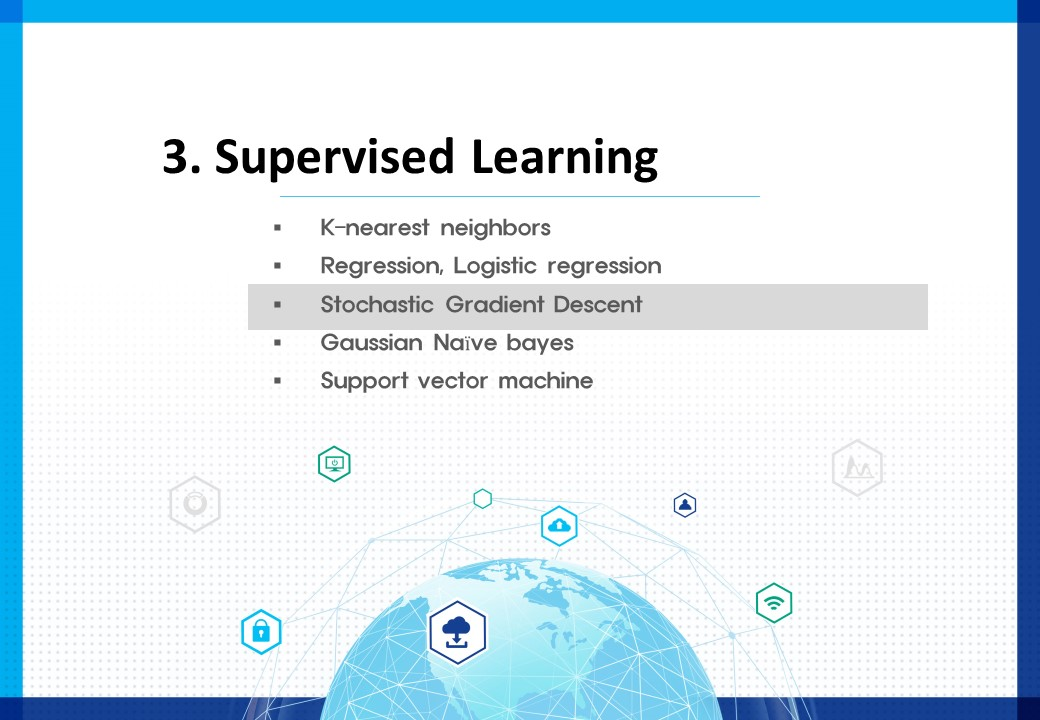

In [3]:
Image(filename=dir_path + '/슬라이드110.jpg', width=width, height=height)

https://www.kaggle.com/ryanholbrook/stochastic-gradient-descent
<img src='https://i.imgur.com/rFI1tIk.gif'>

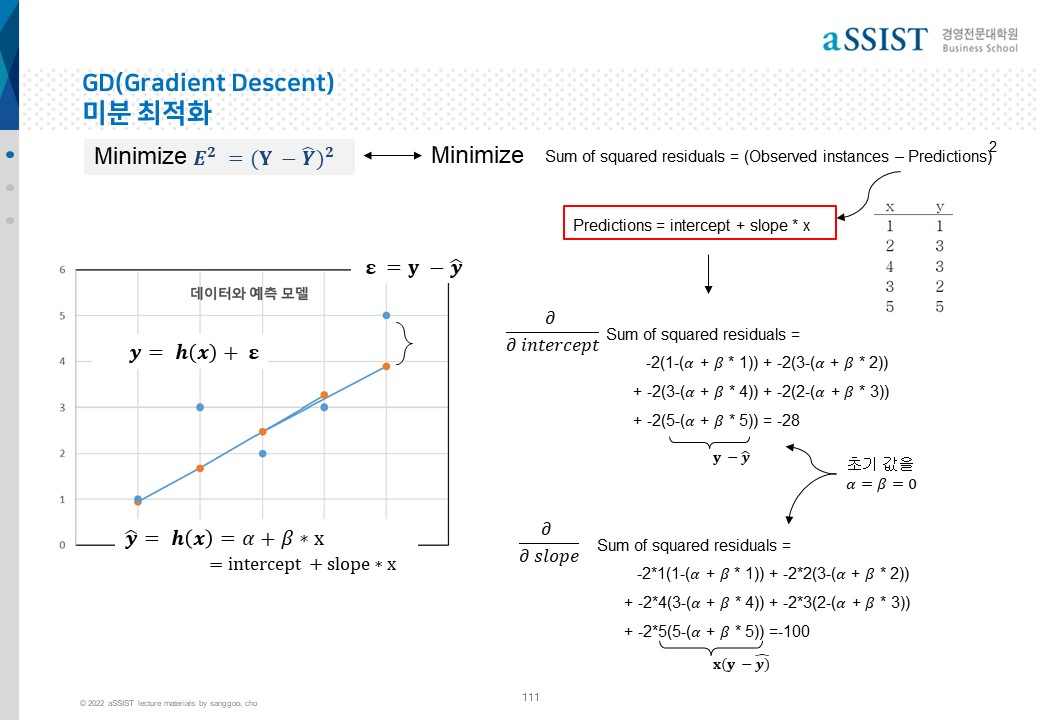

In [4]:
Image(filename=dir_path + '/슬라이드111.jpg', width=width, height=height)

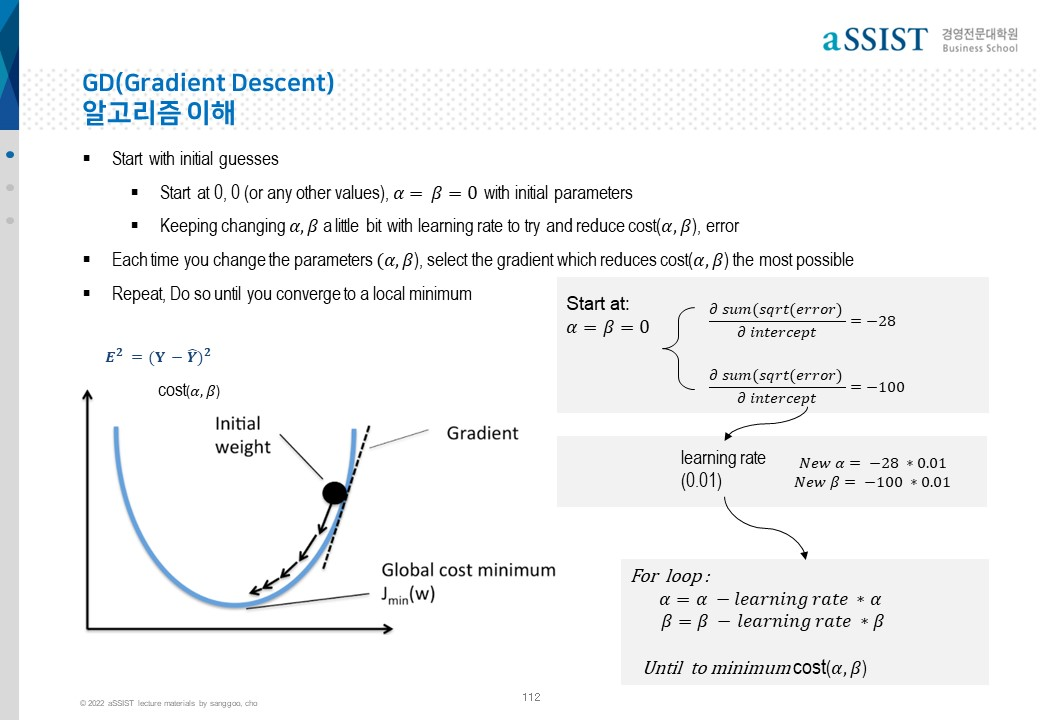

In [5]:
Image(filename=dir_path + '/슬라이드112.jpg', width=width, height=height)

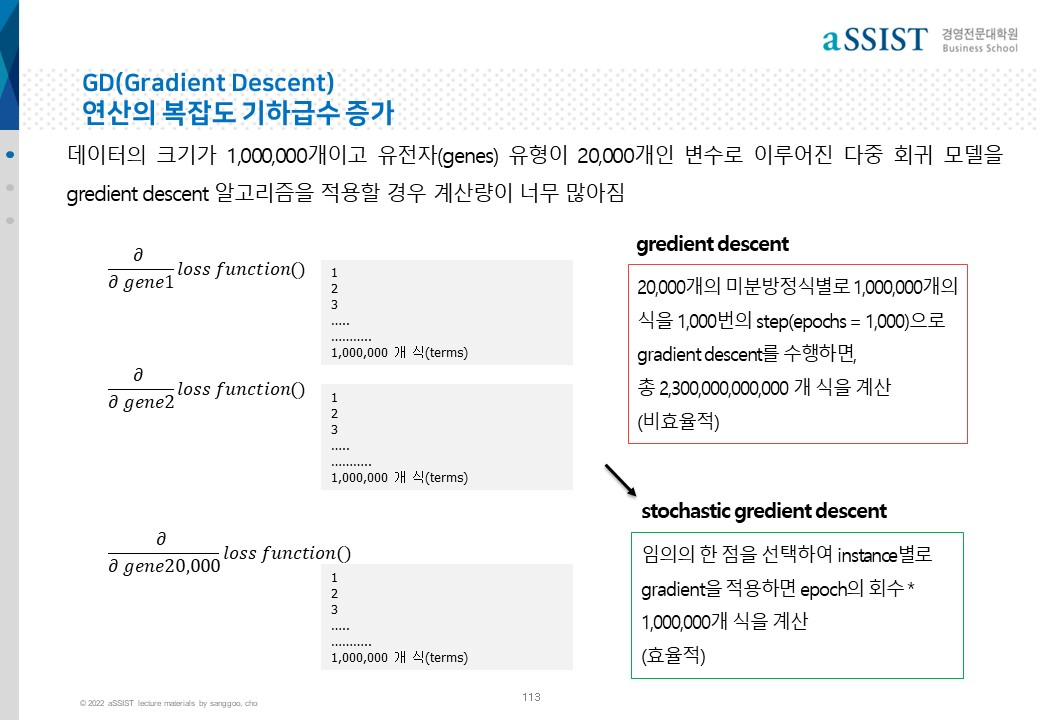

In [6]:
Image(filename=dir_path + '/슬라이드113.jpg', width=width, height=height)

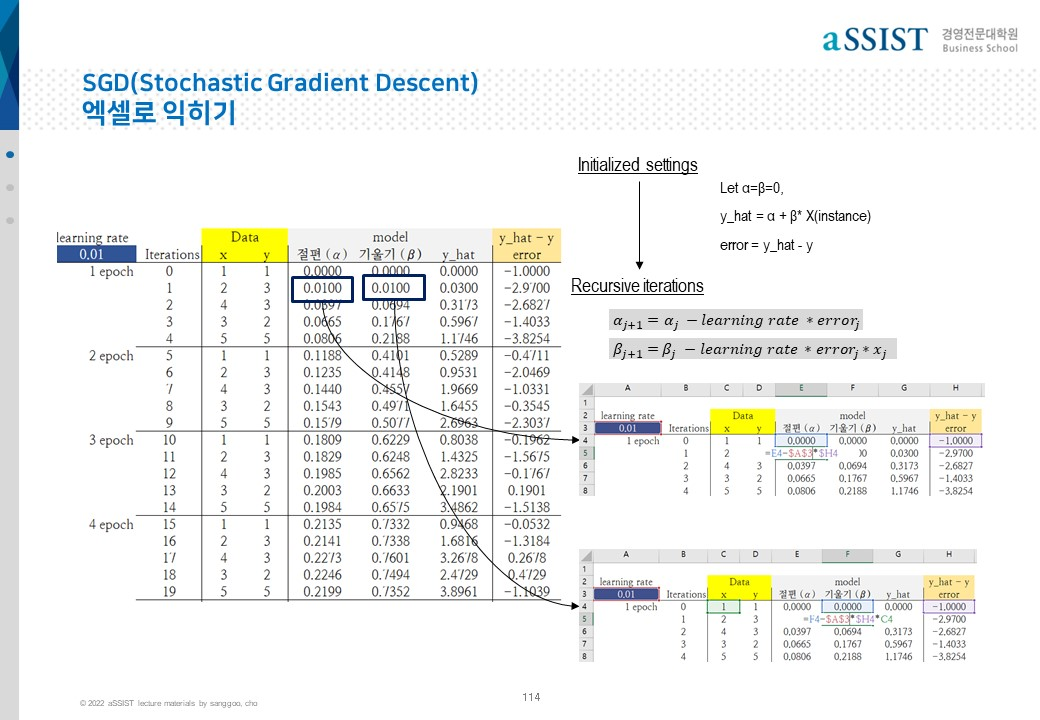

In [7]:
Image(filename=dir_path + '/슬라이드114.jpg', width=width, height=height)

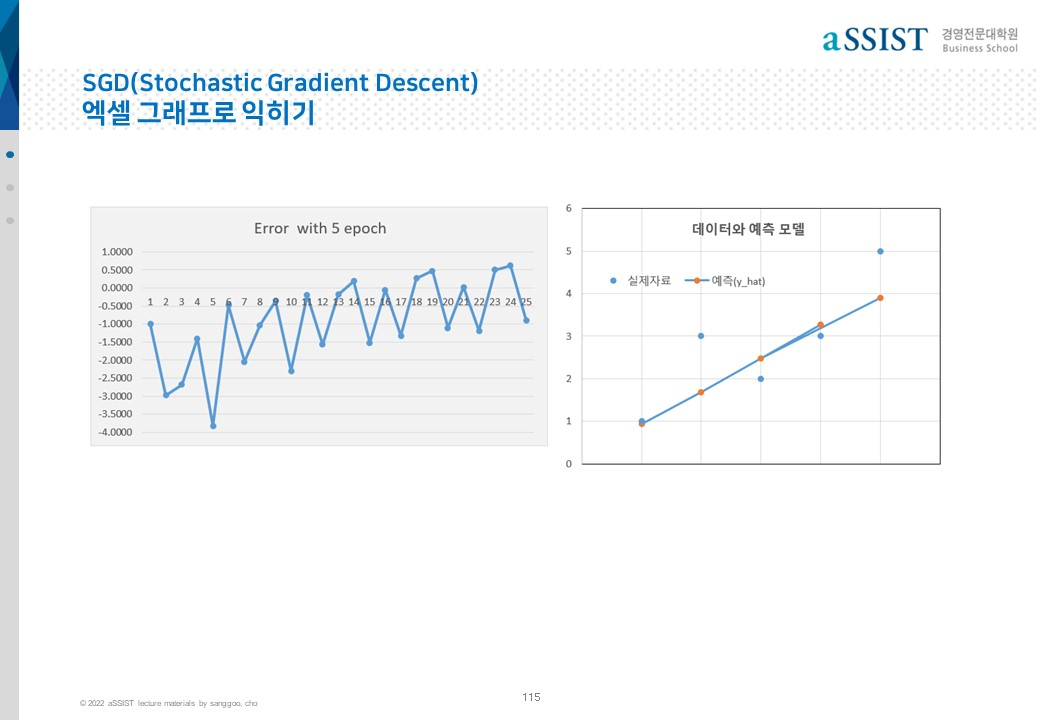

In [8]:
Image(filename=dir_path + '/슬라이드115.jpg', width=width, height=height)

## Data Generation

SGDRegressor(max_iter=9)

선형모델의 절편: [0.23509723], 기울기: [0.78972415]


{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 9,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

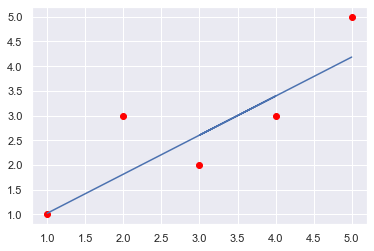

In [7]:
from sklearn import linear_model
X = np.array([1,2,4,3,5])
y = np.array([1,3,3,2,5])
sgd = linear_model.SGDRegressor(max_iter=9) 
sgd.fit(X.reshape(-1,1), y)         # 2. 학습하기
yhat = sgd.predict(X.reshape(-1,1)) #  3. 예측
plt.scatter(X, y, color='red')
plt.plot(X, yhat)
print(f'선형모델의 절편: {sgd.intercept_}, 기울기: {sgd.coef_}') 
sgd.get_params()

### max_iter을 5, 10, 15, 20으로 fitting 

선형모델의 절편: 0.39999999999999947, 기울기: [0.8]


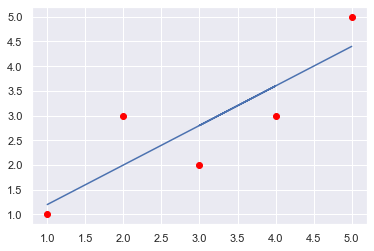

In [8]:
lgr = linear_model.LinearRegression()
yhat = lgr.fit(X.reshape(-1,1), y).predict(X.reshape(-1,1))
plt.scatter(X, y, color='red')
plt.plot(X, yhat)
print(f'선형모델의 절편: {lgr.intercept_}, 기울기: {lgr.coef_}') 

In [9]:
from sklearn import metrics
metrics.mean_squared_error(y, sgd.predict(X.reshape(-1,1)))
metrics.mean_squared_error(y, lgr.predict(X.reshape(-1,1)))

0.5185215425632805

0.47999999999999987

## 예제

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

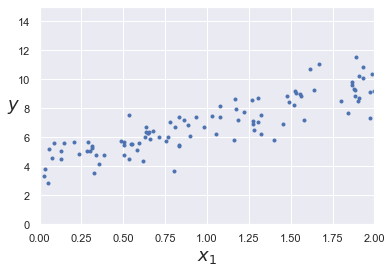

In [10]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 1. 선형대수로 예측
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/704b31aa61dfc93d672f15bf02aa6d168be49643'>
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/e286875158615d5647351c312f4609a125a5d943'>
<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/fb161a08d2371663a73aae304a7ba910b7e9776a'>

array([[4.11707981],
       [2.78022015]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

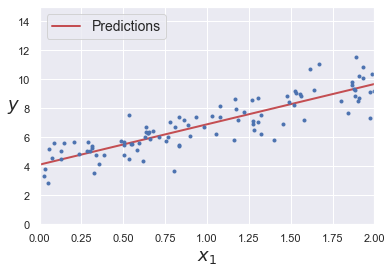

In [11]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## 2. Scikit-learn Linear regression API로 예측

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([4.11707981]), array([[2.78022015]]))

## 3. Scikit-learn SGD로 예측

In [13]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
X[0:3]
X_b[0:3]

array([[1.99541042],
       [1.61358437],
       [1.63981948]])

array([[1.        , 1.99541042],
       [1.        , 1.61358437],
       [1.        , 1.63981948]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

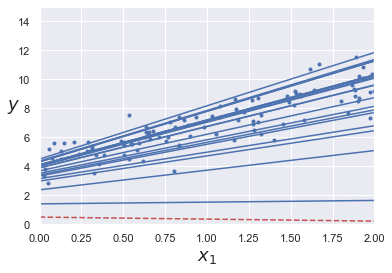

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

## 3가지 선형모델 알고리즘 (fit, predict) 비교
#### 데이터 불러오기

In [15]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.feature_names.extend(housing.target_names)
df = pd.DataFrame(np.c_[housing.data, housing.target], columns = housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
df.corr()[-1:]
X = df[['MedInc', 'AveRooms']]
y = df['MedHouseVal']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.02465,-0.023737,-0.14416,-0.045967,1.0


## 1. Ordinary Least Squares (statisitc models API)

In [17]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.868
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                          6.805e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:13:32   Log-Likelihood:                         -26162.
No. Observations:               20640   AIC:                                  5.233e+04
Df Residuals:                   20638   BIC:                                  5.234e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 2. Regression (scikit learn API)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(X, y)
y_pred = regr.predict(X)
print('Coefficients: \n', regr.coef_)
print('Mean squared error: %.2f'% mean_squared_error(y, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

LinearRegression(fit_intercept=False)

Coefficients: 
 [0.49376576 0.01487299]
Mean squared error: 0.74
Coefficient of determination: 0.45


## 3. Stochastic gradient descent

In [19]:
from sklearn.linear_model import SGDRegressor       # 알고리즘 불러오고 데이터 준비하기
model = SGDRegressor(max_iter=100)                  # 1. 알고리즘 객체화 (max_iter --> aka epochs)
model.fit(X, y)                                      #  2. 학습하기
model.get_params()                                   #  학습한 모델 내부 저장
y_pred = model.predict(X)                            # 3. 예측하기 (unseen data)
print(f'모델의 Mean squared error는 :{mean_squared_error(y, y_pred).round(4)}')
model.coef_
model.intercept_

SGDRegressor(max_iter=100)

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 100,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

모델의 Mean squared error는 :0.7129


array([ 0.43807757, -0.00732294])

array([0.52882091])

<img src='https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif'>

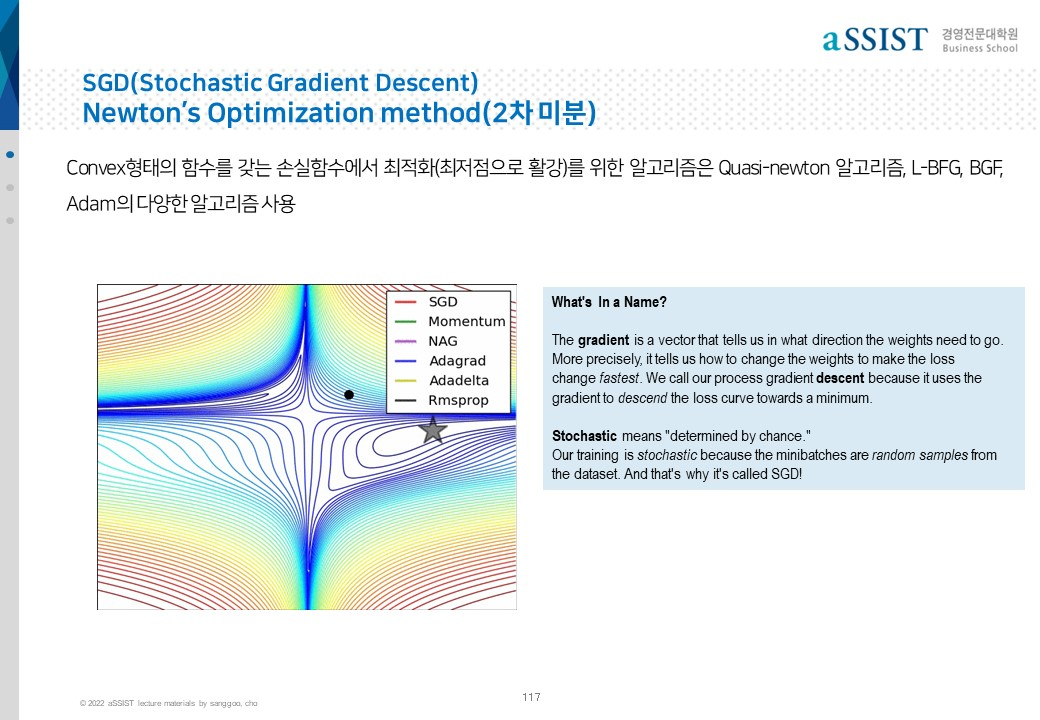

In [10]:
Image(filename=dir_path + '/슬라이드117.jpg', width=width, height=height)

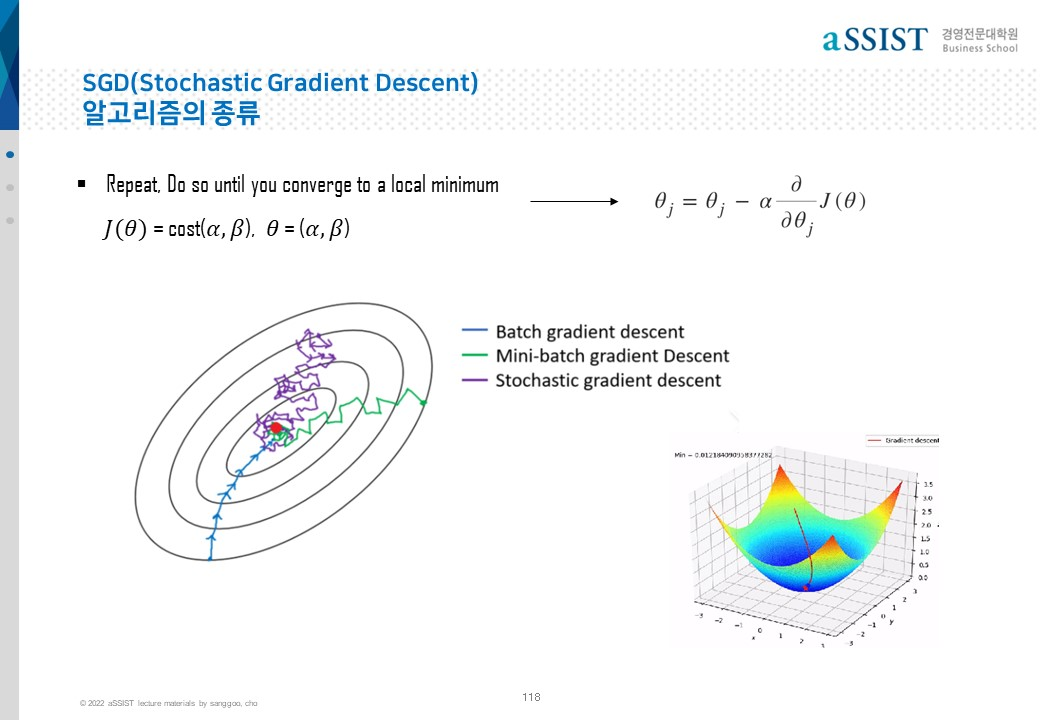

In [11]:
Image(filename=dir_path + '/슬라이드118.jpg', width=width, height=height)

# End